## proyecto machine learning  -  parte modelos
Gretel De Cuyper

**seguimiento del proyecto en este notebook a partir de 4.2.**

**contenido proyecto**

0. Instalación software

1. Importar librerías   

2. Importar (y en este caso: constituir) dataset   

3. Primera exploración dataset  
3.1. Información 'real world' sobre el dataset   
3.2. Distribución de las variables y su relación con target  
3.2.1. Target: distribución de sus valores  
3.2.2. Variables numéricas  
-- a) distribución de los valores de cada variable  
-- b) distribución de las variables respecto a la target  
3.2.3. Variables categóricas  
-- 3.2.3.1. distribución de los varloes de cada variables  
-- 3.2.3.2. distribución de las variables respecto a la target  

4. Preprocesado dataset  
4.1. FASE 1 : transformar el dataset para su modelling (los puntos siguientes no se tratarán literalmente en el orden dado, pero sí dan un vistazo de las modadilidades de transformación)  
•	4.1.1. Layout  
•	4.1.2. Transformaciones que afectan al contenido/procesamiento  
-- 4.1.2.1. Encoding?  
-- 4.1.2.2. Missing values?  
-- 4.1.2.3. Duplicados?  
•	4.1.3. Peso dataset  
<br>
4.2. FASE 2 : preparación específica del dataset para el modelling  
•	4.2.1. Split X & y  
•	4.2.2. Split train & test  
•	4.2.3. Class Imbalance   
•	4.2.4. Scaling   
   
5. Entrenar algoritmos: 
probar modelos (dividos en grupos por usar datos escalados vs. no) + evaluar + optimizar  
---------------------------MODELOS 'SIMPLES'--------------------:
- logistic regression: básico, cambio hyperparámetros, con cv
- SVM: básico, cambio hyperparámetros, con cv
- KNN: básico, cambio hyperparámetros, con cv
- Naive Bayes: básico, cambio hyperparámetros, con cv
- Decision Tree: básico, cambio hyperparámetros, con cv  
----------------------------------ENSAMBLES-------------------:
- Voting Classifier: básico, cambio hyperparámetros, con cv
- Bagging Classifier: básico, cambio hyperparámetros, con cv
- Pasting Classifier: básico, cambio hyperparámetros, con cv
- Random Forest Classifier: básico, cambio hyperparámetros, con cv
- AdaBoost Classifier: básico, cambio hyperparámetros, con cv
- GradientBoostingClassifier: básico, cambio hyperparámetros, con cv
- XGBoost Classifier: básico, cambio hyperparámetros, con cv

--------------------------------------------------------------:
- aplicación de Pipeline

6. Seleccionar algoritmo
7. Optimizar algoritmo
8. Guardar algoritmo


# 0. Instalar software

In [1]:
#pip install graphing

In [2]:
#!pip install missingno

In [3]:
#pip install sharp

# 1. Importar librerías

In [108]:
#LOAD AMD MANIPULATE DATA
import pandas as pd
from pandas_summary import DataFrameSummary

#CALCULATE WITH DATA (mean, std)
import numpy as np

#ML PREPROCESSING - ANALISIS DE DATOS PREDICTIVO
##encoders
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
##scalers
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
##balancers
#from imblearn.over_sampling import SMOTE

#ML PROCESSING
## classification
### linear
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
### regularizacion
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV  #performs automatic tuning for hyperPa
from sklearn.linear_model import LassoCV #performs automatic tuning for hyperPA
from sklearn.linear_model import ElasticNetCV #performas automatic tuning for hyperPA
### ensambles - classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier  #incl pasting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## vis build
from sklearn.tree import plot_tree

## split data into training and testing sets
from sklearn.model_selection import train_test_split

## evaluation:
### classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from statsmodels.iolib import summary
### visualizacion
from sklearn.metrics import plot_confusion_matrix

## agrupación
# ### modelos/parametros/splits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV   ###
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
### evaluation
from sklearn.model_selection import cross_val_score

# ML OPTIMALIZATION: contribución de los ff (siempre respecto al modelo!)
from sklearn.inspection import permutation_importance
from sklearn.base import clone
# sharp import summary_plot

# GENERAL: visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import graphing
import missingno as msno

#guardar modelos
import pickle

# quitar deprecationwarnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# no integrado: deeplearning (tensorflow,...)

# 4.2. FASE 2 - PREPARACIÓN DEL DATASET PARA EL MODELLING

In [8]:
data_proc = pd.read_csv("../data/processed/dataset_input_ML.csv")

In [9]:
data_proc

,age,education-num,hours-per-week,capital-gain,sex,REL-NotInFam,REL-OtherRelat,REL-OwnChild,REL-Unmarr,REL-Spouse,result_01
0,39,13,40,2174,1,1,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,1,0
2,38,9,40,0,1,1,0,0,0,0,0
3,53,7,40,0,1,0,0,0,0,1,0
4,28,13,40,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,1,0,0,1,0,0,0
46029,39,13,36,0,0,1,0,0,0,0,0
46030,38,13,50,0,1,0,0,0,0,1,0
46031,44,13,40,5455,1,0,0,1,0,0,0


## 4.2.1. Split X & y

In [10]:
X = data_proc.drop("result_01", axis = 1)
y = data_proc["result_01"]

## 4.2.2. Split train & test

In [11]:
#train,split mediante test_size para hacer un split 'aleatorio' + nos aseguramos que la proporción de los valores del target se mantiene tanto en train como en test, lo que puede resultar útil en caso de un target (fuertemente o ligeramente desbalanceado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)   #stratify mejora el roc_auc_score

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36826, 10)
(36826,)
(9207, 10)
(9207,)


## 4.2.3. Feature Scaling

Aunque los valores de nuestros features no están extremadamente extendida (a excepción de capital-gain), sí puede tener sentido escalar los datos de cara a los modelos que probaremos. A parte de las columnas categóricas transformadas a números (cuyo valor se sitúa en todas nuestras columnas relevante entre 0 y 1), en la columna de age el rango es de 17 hasta 90, en la columna working hours se sitúan entre 1 y 99: 

In [13]:
print("-----min values-----:")
print(data_proc[["age","education-num","hours-per-week", "capital-gain"]].min())
print("-----max values-----:")
print(data_proc[["age","education-num","hours-per-week", "capital-gain"]].max())

-----min values-----:
age               17
education-num      1
hours-per-week     1
capital-gain       0
dtype: int64
-----max values-----:
age                  90
education-num        16
hours-per-week       99
capital-gain      99999
dtype: int64


Subdivisión en el tratamiento de los datos:  
CAMINO A. para todos aquellos modelos que incluyan DecisionTrees: preferiblemente SIN scaling    
CAMINO B. para todos los demás modelos: el scaling está aconsejado

Dado que el scaling es un proces (des)aconsejado según el modelo, tomaremos 2 caminos: para el uso 'manual' de los modelos, escalamos ya los datos de X_train en una NUEVA variable, así que nos quedamos con X_train no escalado.  
Para aplicaciones de modelos mediante pipelines, usaremos el X_train no escalado.
Un ejemplo donde se aplica son los SVM:

*"Feature scaling is mapping the feature values of a dataset into the same range. Feature scaling is crucial for some machine learning algorithms, which consider distances between observations because the distance between two observations differs for non-scaled and scaled cases.

As we’ve already stated, the decision boundary maximizes the distance to the nearest data points from different classes. Hence, the distance between data points affects the decision boundary SVM chooses. In other words, training an SVM over the scaled and non-scaled data leads to the generation of different models."*
https://www.baeldung.com/cs/svm-feature-scaling

>> CAMINO A (X_train no escalado)

In [14]:
X_train

,age,education-num,hours-per-week,capital-gain,sex,REL-NotInFam,REL-OtherRelat,REL-OwnChild,REL-Unmarr,REL-Spouse
32402,51,10,50,0,1,0,0,0,0,1
27636,64,10,40,0,1,1,0,0,0,0
40047,54,6,40,0,1,0,0,0,0,1
31522,22,10,40,0,1,1,0,0,0,0
43982,27,9,40,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1054,36,13,40,0,1,0,0,0,0,1
43724,34,8,40,0,1,0,0,0,0,1
26241,34,12,40,0,0,0,0,0,0,1
32551,26,13,40,0,1,1,0,0,0,0


>> CAMINO B (X_train escalado)

In [15]:
STscaler = StandardScaler().fit(X_train)
X_train_scaled = STscaler.transform(X_train)
X_train_scaled

array([[ 0.94297597, -0.05293484,  0.75881737, ..., -0.4133114 ,
        -0.34588667,  1.08536733],
       [ 1.92828153, -0.05293484, -0.07681231, ..., -0.4133114 ,
        -0.34588667, -0.92134706],
       [ 1.17035418, -1.61306164, -0.07681231, ..., -0.4133114 ,
        -0.34588667,  1.08536733],
       ...,
       [-0.34550052,  0.72712856, -0.07681231, ..., -0.4133114 ,
        -0.34588667,  1.08536733],
       [-0.9518424 ,  1.11716026, -0.07681231, ..., -0.4133114 ,
        -0.34588667, -0.92134706],
       [-0.87604967,  1.11716026, -0.07681231, ..., -0.4133114 ,
        -0.34588667, -0.92134706]])

## 4.2.4. Balancear los datos

No hemos aplicado el proceso, a parte de la introducción de stratify en el split de train-test. En varios modelos, se puede balancear también el peso de los features. No hemos podido profundizar las diferencias con por ejemplo la apliación de SMOTE.

# **5. Entrenar algoritmos con data_proc**

##  5.1. Varios modelos por separado 

Hacemos correr varios modelos de clasificación, cada uno por separado, según el camino A o B.

Con alguna excepción (SVM y NB), para cada 'tipo modelo', hacemos correr una versión 'básica' (sin o con apenas unos parmámetros modificados), una variante (con algunos parámetros especificados) y también aplicamos un cross-validation. 

Los modelos tratados son:

- Logistic Regression
- SVM
- K-Nearest Neighbour
- Naive Bayes
- Decision Tree
- Ensambles:
-- Voting Classifier  
-- Bagging Classifier  
-- Pasting Classifier  
-- Random Forest  
-- AdaBoostClassifier  
-- GradientBoostClassifier  
-- XGBoostClassifier  

### **LOGISTIC REGRESSION - BASIC**

In [13]:
logreg_bas = LogisticRegression()
logreg_bas_trained = logreg_bas.fit(X_train_scaled, y_train)   #con X_train_scaled antes menos...
logreg_bas_trained

LogisticRegression()

In [14]:
y_pred = logreg_bas_trained.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


recall_score: 1.0
f1_score: 0.39752850056566014
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6923
           1       0.25      1.00      0.40      2284

    accuracy                           0.25      9207
   macro avg       0.12      0.50      0.20      9207
weighted avg       0.06      0.25      0.10      9207

roc_auc_score: 0.5
[[   0 6923]
 [   0 2284]]


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

confusion matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002153B1D9488>


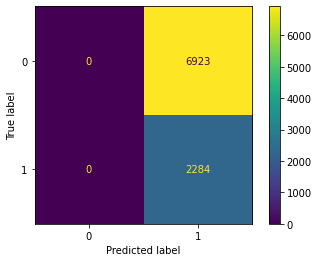

In [15]:
print("recall_score:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
print("classification report:", classification_report(y_test,y_pred))
print("roc_auc_score:", roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("confusion matrix:", plot_confusion_matrix(logreg_bas_trained,X_test,y_test))

Nos da un resultado 'perfecto' de predicción en cuanto a recall, pero sospechamos fuertemente, al no poder predecir ningún '0'. No hemos podido profundizar en el por qué de este resultado. No lo tomamos en consideración como 'mejor modelo'.

### LOGREG - VAR1 - CLASS WEIGHT BALANCED

In [16]:
logreg_var1 = LogisticRegression(class_weight = "balanced")
logreg_var1.fit(X_train_scaled,y_train)   #sin scaled no funciona
y_pred = logreg_var1.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.24807211903986098
0.39752850056566014
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6923
           1       0.25      1.00      0.40      2284

    accuracy                           0.25      9207
   macro avg       0.12      0.50      0.20      9207
weighted avg       0.06      0.25      0.10      9207

0.5


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

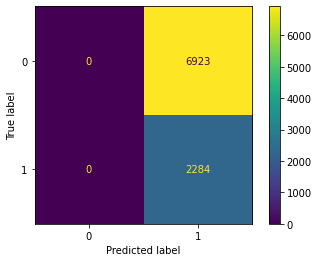

In [17]:
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(logreg_var1,X_test,y_test))

### LOG REG - CV

In [18]:
kfold = StratifiedKFold(n_splits=5)
logreg_cv = LogisticRegression()
cv_results = cross_val_score(logreg_cv, X_train_scaled,y_train,cv=kfold,scoring="recall")
#TOTAL LIMIT REACHED IF NOT WITH DATA SCALED!!!

In [19]:
cv_results.mean()

0.5535161850147137

In [20]:
cv_results.std()

0.016599789656872314

### **SVM - BASIC**

In [21]:
svc_bas = SVC()
svc_bas.fit(X_train_scaled,y_train)
y_pred = svc_bas.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


métricas:

0.0
0.0
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6923
           1       0.00      0.00      0.00      2284

    accuracy                           0.75      9207
   macro avg       0.38      0.50      0.43      9207
weighted avg       0.57      0.75      0.65      9207

0.5


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

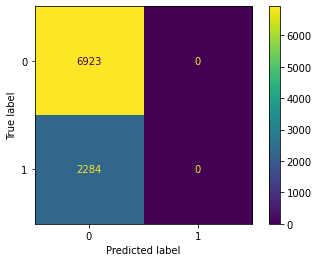

In [22]:
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(svc_bas,X_test,y_test))

Aquí también un resultado muy extraño. No hemos podido profundizar.

### LinearSVM bas

In [23]:
svc_lineal_clas = LinearSVC()
svc_lineal_clas.fit(X_train_scaled,y_train)
y_pred = svc_lineal_clas.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


recall: 1.0
0.39752850056566014
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6923
           1       0.25      1.00      0.40      2284

    accuracy                           0.25      9207
   macro avg       0.12      0.50      0.20      9207
weighted avg       0.06      0.25      0.10      9207

0.5


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

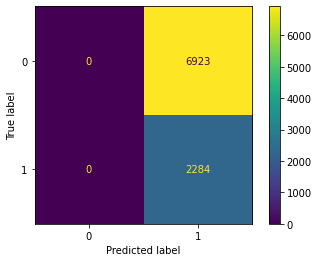

In [24]:
print("recall:", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(svc_lineal_clas,X_test, y_test))

Nuevamente, resultado poco fiable, parece...

### SVM - VAR1-kernel+balanceado+regularizado   &    VAR2-kernelpoly

In [25]:
#svc_var1 = SVC(kernel = "rbf", class_weight="balanced",C = 5)   #C=2/3 0.32,0.59
#svc_var1.fit(X_train_scaled,y_train)
#y_pred = svc_var1.predict(X_test)

In [1]:
#print(recall_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(svc_var1,X_test,y_test))

Mismo problema...: recall de 100% (y 0% para predecir la clase < 50.000 dolares)

In [2]:
#ultimo recorrido: demasiado tiempo y antes no mejoría resultado => bloqueado para nuevas ejecuciones
#svc_var2_poly = SVC(kernel = "poly", class_weight="balanced", C= 100)     #1,5,10,100
#svc_var2_poly.fit(X_train_scaled,y_train)
#y_pred = svc_var2_poly.predict(X_test)

In [3]:
#print(recall_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(svc_var2_poly,X_test,y_test))

value of gamma can also be adapted

### **KNN** - básico

In [4]:
knn_bas = KNeighborsClassifier()
knn_bas.fit(X_train_scaled,y_train)   #con scaled solo 0.229 recall
y_pred = knn_bas.predict(X_test)

NameError: name 'KNeighborsClassifier' is not defined

recall: 0.32428884026258203
0.40781507980187126
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6922
           1       0.55      0.32      0.41      2285

    accuracy                           0.77      9207
   macro avg       0.68      0.62      0.63      9207
weighted avg       0.74      0.77      0.74      9207

0.6182264773401902


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


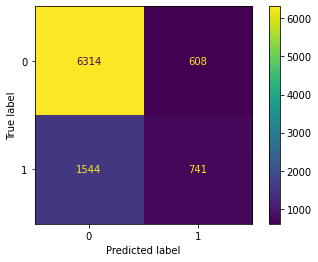

In [ ]:
print("recall:", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(knn_bas,X_test, y_test))

### KNN - neighbors

In [16]:
knn_vec = KNeighborsClassifier(n_neighbors=7)    #mejor entre 2-8
knn_vec.fit(X_train_scaled,y_train)
y_pred = knn_vec.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


recall score: 0.21541155866900175
0.3194805194805194
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6923
           1       0.62      0.22      0.32      2284

    accuracy                           0.77      9207
   macro avg       0.70      0.59      0.59      9207
weighted avg       0.75      0.77      0.73      9207

0.5857499798256174


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


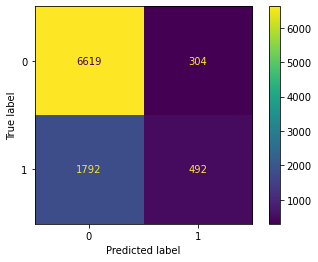

In [17]:
print("recall score:", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(knn_vec,X_test,y_test))

## KNN + CV

In [18]:
kfold = StratifiedKFold(n_splits=5) 
modelo_knn_cv = KNeighborsClassifier()  #no importa 7/9
cv_results = cross_val_score(modelo_knn_cv, X_train_scaled,y_train,cv=kfold,scoring="recall")

In [19]:
cv_results.mean()

0.5708052324780613

In [20]:
cv_results.std()

0.017751666484991158

## NAIVE BAYES - Base

KOHAVI:  
requiere strong independence relations  
robust concerning irrelevant data: useful in cases where there are no attributes with a main effect

In [21]:
nb_bas = GaussianNB()
nb_bas.fit(X_train,y_train)    #con scaled solo 0.22
y_pred = nb_bas.predict(X_test)

recall score: 0.47723292469352013
0.5747429475349328
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6923
           1       0.72      0.48      0.57      2284

    accuracy                           0.82      9207
   macro avg       0.78      0.71      0.73      9207
weighted avg       0.81      0.82      0.81      9207

0.7083550149973451


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


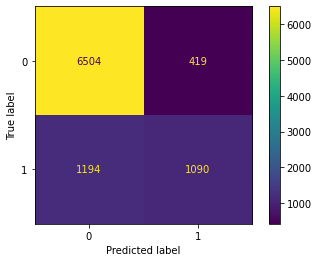

In [22]:
print("recall score:", recall_score(y_test, y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(nb_bas,X_test,y_test))

### NAIVE BAYES - sin variante

In [23]:
#nb_var1= GaussianNB()  #priors?, var_smoothing?
#nb_var1.fit(X_train,y_train)
#y_pred = nb_var1.predict(X_test)

In [24]:
#print(recall_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
#p<rint(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(nb_var1, X_test,y_test))

## **DECISION TREE**

In [25]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

0.5774956217162872
0.6263057929724597
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6923
           1       0.68      0.58      0.63      2284

    accuracy                           0.83      9207
   macro avg       0.78      0.74      0.76      9207
weighted avg       0.82      0.83      0.82      9207

0.7447639888156764


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


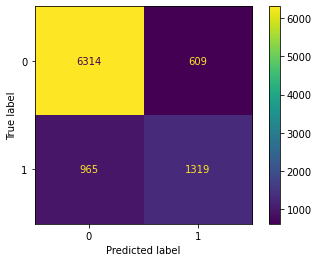

In [26]:
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(tree,X_test,y_test))

### DECISION TREE - CLass weight, maxdepth

In [27]:
tree_var1 = DecisionTreeClassifier(class_weight="balanced", max_depth = 4, random_state=35)   #entre 3-4
tree_var1.fit(X_train,y_train)
y_pred = tree_var1.predict(X_test)

0.8690893169877408
0.6451088722781929
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      6923
           1       0.51      0.87      0.65      2284

    accuracy                           0.76      9207
   macro avg       0.73      0.80      0.73      9207
weighted avg       0.84      0.76      0.78      9207

0.7984042569338531


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


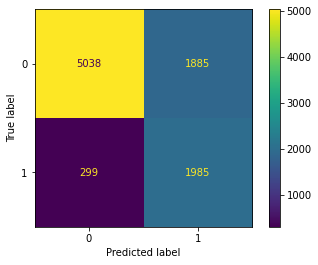

In [28]:
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(tree_var1,X_test,y_test))

## DECISION TREE + CV

In [29]:
kfold = KFold(n_splits=5)   #stratified hace bajar ligeramente 0.04 pero luego KFold igual..
dec_tree_cv = DecisionTreeClassifier(class_weight="balanced", max_depth = 4, random_state=35) 
cv_results = cross_val_score(dec_tree_cv, X_train,y_train,cv=kfold,scoring="recall")

In [ ]:
cv_results.mean()

0.8696737459030007

In [30]:
cv_results.std()

0.00916443423035975

## **ENSAMBLES**

## VOTING CLASSIFIER - BAS

In [32]:
models = [('DecTree',DecisionTreeClassifier()),('KNN',KNeighborsClassifier())]
vot_clas = VotingClassifier(estimators=models)
vot_clas.fit(X_train,y_train)
y_pred = vot_clas.predict(X_test)

RECALL SCORE =  0.5030647985989493
0.6063324538258577
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6923
           1       0.76      0.50      0.61      2284

    accuracy                           0.84      9207
   macro avg       0.81      0.73      0.75      9207
weighted avg       0.83      0.84      0.83      9207

0.7257487794814768


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


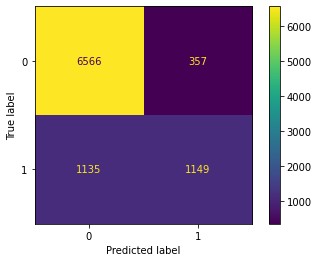

In [33]:
print("RECALL SCORE = ", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(vot_clas,X_test,y_test))

## VOTING CLASSIFIER - VAR

In [34]:
models = [('DecTree',DecisionTreeClassifier()),('KNN',KNeighborsClassifier())]
vot_clas = VotingClassifier(estimators=models, voting = "soft")
vot_clas.fit(X_train,y_train)
y_pred = vot_clas.predict(X_test)

RECALL SCORE =  0.5980735551663747
0.6437323279924599
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6923
           1       0.70      0.60      0.64      2284

    accuracy                           0.84      9207
   macro avg       0.79      0.76      0.77      9207
weighted avg       0.83      0.84      0.83      9207

0.7561363009112244


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


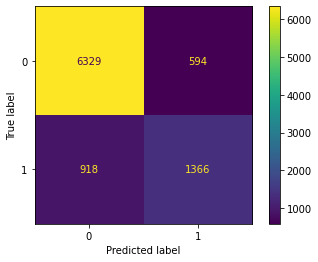

In [35]:
print("RECALL SCORE = ", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(vot_clas,X_test,y_test))

## VOTING CLASSIFIER + CV

In [36]:
models = [('DecTree',DecisionTreeClassifier(max_depth=4)),('KNN',KNeighborsClassifier())]  #depth no TF nada
kfold = StratifiedKFold(n_splits=5)
vot_clas_cv = VotingClassifier(estimators=models)
cv_results = cross_val_score(vot_clas_cv, X_train,y_train,cv=kfold,scoring="recall")

In [37]:
cv_results.mean()

0.432592440884903

In [38]:
cv_results.std()

0.015754155663442734

## BAGGING

In [39]:
bagg_clas = BaggingClassifier()    #default Dec Teree
bagg_clas.fit(X_train,y_train)
y_pred = bagg_clas.predict(X_test)

RECALL SCORE = 0.591506129597198
0.6399810516342965
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6923
           1       0.70      0.59      0.64      2284

    accuracy                           0.83      9207
   macro avg       0.78      0.75      0.77      9207
weighted avg       0.83      0.83      0.83      9207

0.7533581492995378


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


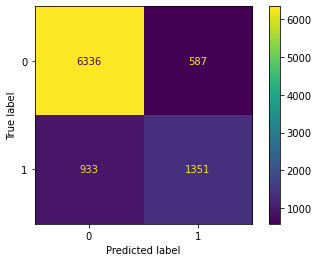

In [40]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(bagg_clas,X_test,y_test))

### BAGGING - VAR

In [41]:
bagg_clas_var1 = BaggingClassifier(n_estimators = 100)   
bagg_clas_var1.fit(X_train,y_train)
y_pred = bagg_clas_var1.predict(X_test)

RECALL SCORE = 0.6024518388791593
0.6467685076380728
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6923
           1       0.70      0.60      0.65      2284

    accuracy                           0.84      9207
   macro avg       0.79      0.76      0.77      9207
weighted avg       0.83      0.84      0.83      9207

0.7582532197429164


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


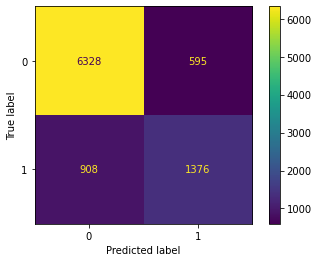

In [42]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(bagg_clas_var1,X_test,y_test))

### BAGGING + CV

In [43]:
kfold = StratifiedKFold(n_splits=5)
mod_bag_cv = BaggingClassifier(n_estimators=50, random_state=35) 
cv_results = cross_val_score(mod_bag_cv, X_train,y_train,cv=kfold,scoring="recall")

In [44]:
cv_results.mean()

0.5866735773511598

In [45]:
cv_results.std()

0.01727828776147768

## **PASTINGCLASSIFIER**

In [46]:
past_clas = BaggingClassifier(bootstrap=False)
past_clas.fit(X_train,y_train)
y_pred = past_clas.predict(X_test)

In [47]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(rf_var1,X_test,y_test))

RECALL SCORE = 0.5779334500875657
0.6273764258555135
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6923
           1       0.69      0.58      0.63      2284

    accuracy                           0.83      9207
   macro avg       0.78      0.75      0.76      9207
weighted avg       0.82      0.83      0.82      9207

0.7453440181248171


### PASTING CLASSIFIER - VAR

In [48]:
past_clas = BaggingClassifier(n_estimators = 50, max_features=8, bootstrap = False)
past_clas.fit(X_train,y_train)
y_pred = past_clas.predict(X_test)

In [49]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(rf_var1,X_test,y_test))

RECALL SCORE = 0.5936952714535902
0.6480286738351254
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6923
           1       0.71      0.59      0.65      2284

    accuracy                           0.84      9207
   macro avg       0.79      0.76      0.77      9207
weighted avg       0.83      0.84      0.83      9207

0.7574860872651455


### PASTING CLASSIFIER - CV

In [50]:
kfold = KFold(n_splits=5)  #Stratified mejora de 0.30! pero luego tb con KFold...
modelo_cv = BaggingClassifier(bootstrap=False, max_features = 5, n_estimators = 75, random_state=35) 
cv_results = cross_val_score(modelo_cv, X_train,y_train,cv=kfold,scoring="recall")

In [51]:
cv_results.mean()

0.4502045401117143

In [52]:
cv_results.std()

0.010133888165628553

## **RANDOMFOREST**

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

RECALL SCORE =  0.600262697022767
0.6471560066084494
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6923
           1       0.70      0.60      0.65      2284

    accuracy                           0.84      9207
   macro avg       0.79      0.76      0.77      9207
weighted avg       0.83      0.84      0.83      9207

0.7580975481358238


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


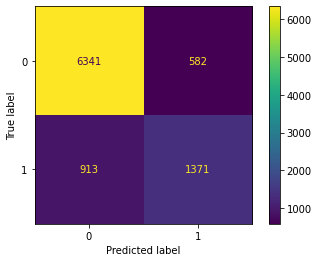

In [54]:
print("RECALL SCORE = ", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(rf,X_test,y_test))

### RANDOM FOREST - VAR

In [55]:
rf_var1 = RandomForestClassifier(class_weight= "balanced", max_depth=6) #entre 3-8: 6 mejor, 3 cerca
rf_var1.fit(X_train,y_train)
y_pred = rf_var1.predict(X_test)

RECALL SCORE = 0.8787215411558669
0.6704526474027058
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      6923
           1       0.54      0.88      0.67      2284

    accuracy                           0.79      9207
   macro avg       0.75      0.82      0.76      9207
weighted avg       0.85      0.79      0.80      9207

0.816870520686268


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


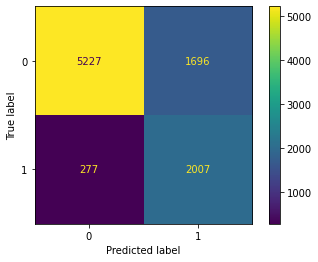

In [56]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(rf_var1,X_test,y_test))

## RANDOM FOREST + CV

In [57]:
kfold = KFold(n_splits=5)   #Stratified hace bajar 0.04, pero luego tb igual con KFold: tb bajado 0.04 respecto a resultado anterior
modelo_cv = RandomForestClassifier(class_weight="balanced", max_depth = 4, random_state=35) 
cv_results = cross_val_score(modelo_cv, X_train,y_train,cv=kfold,scoring="recall")

In [58]:
cv_results.mean()

0.8746476736779417

In [59]:
cv_results.std()

0.011700812101474991

### **ADABOOST - BAS**

In [60]:
ada_bas = AdaBoostClassifier()
ada_bas.fit(X_train,y_train)
y_pred = ada_bas.predict(X_test)

RECALL SCORE =  0.5512259194395797
0.6394108684611477
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6923
           1       0.76      0.55      0.64      2284

    accuracy                           0.85      9207
   macro avg       0.81      0.75      0.77      9207
weighted avg       0.84      0.85      0.84      9207

0.7470848649631814


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


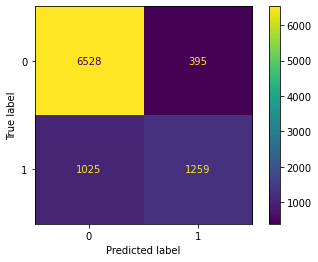

In [61]:
print("RECALL SCORE = ", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(ada_bas,X_test,y_test))

### ADABOOST - var

In [62]:
ada_var1 = AdaBoostClassifier(n_estimators=200, learning_rate =0.9)  #entre 5-7, enre 0.5 en 1
ada_var1.fit(X_train,y_train)
y_pred = ada_var1.predict(X_test)

In [63]:
print("RECALL SCORE =", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#print(plot_confusion_matrix(ada_var1,X_test,y_test))

RECALL SCORE = 0.5691768826619965
0.6532663316582915
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6923
           1       0.77      0.57      0.65      2284

    accuracy                           0.85      9207
   macro avg       0.82      0.76      0.78      9207
weighted avg       0.84      0.85      0.84      9207

0.7559881235496896


### ADABOOST + CV

In [64]:
kfold = StratifiedKFold(n_splits=5) #Stratifed mejora score de 0.32
modelo_cv = AdaBoostClassifier(random_state=35) 
cv_results = cross_val_score(modelo_cv, X_train,y_train,cv=kfold,scoring="recall")

In [65]:
cv_results.mean()

0.5480426713807836

In [66]:
cv_results.std()

0.013979009399454297

## **GRADIENTBOOST**

In [67]:
gradboost_clas = GradientBoostingClassifier()
gradboost_clas.fit(X_train,y_train)
y_pred = gradboost_clas.predict(X_test)

RECALL SCORE = 0.746586564718733
0.6643985419198055
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6923
           1       0.75      0.60      0.66      2284

    accuracy                           0.85      9207
   macro avg       0.81      0.77      0.78      9207
weighted avg       0.84      0.85      0.84      9207

0.7657442083078991


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


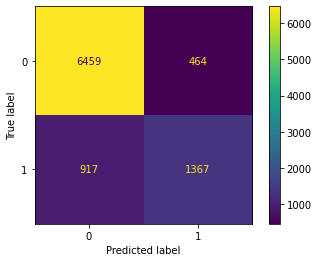

In [69]:
print("RECALL SCORE =", recall_score(y_pred,y_test))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(gradboost_clas,X_test,y_test))

### GRADIENTBOOST + VAR

In [70]:
gradboost_clas_var = GradientBoostingClassifier(n_estimators=150, loss="exponential", min_samples_split = 3, learning_rate=0.3)
gradboost_clas_var.fit(X_train,y_train)
y_pred = gradboost_clas_var.predict(X_test)

RECALL SCORE = 0.744198312236287
0.6751196172248805
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6923
           1       0.74      0.62      0.68      2284

    accuracy                           0.85      9207
   macro avg       0.81      0.77      0.79      9207
weighted avg       0.85      0.85      0.85      9207

0.7738597489573196


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


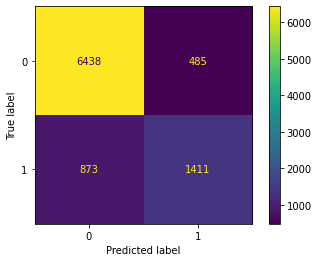

In [71]:
print("RECALL SCORE =", recall_score(y_pred,y_test))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(gradboost_clas_var,X_test,y_test))

## GRADIENTBOOST + CV

In [72]:
kfold = KFold(n_splits=5)     #Stratified no mejora recall 
modelo_cv = GradientBoostingClassifier(n_estimators=150, loss= "exponential", min_samples_split=3, learning_rate=0.3, randomstate=27) 
cv_results = cross_val_score(modelo_cv, X_train,y_train,cv=kfold,scoring="recall")

TypeError: __init__() got an unexpected keyword argument 'randomstate'

In [73]:
cv_results.mean()

0.5480426713807836

In [74]:
cv_results.std()

0.013979009399454297

## **XGBOOST**

In [75]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RECALL SCORE = 0.7425847457627118
0.6720997123681687
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6923
           1       0.74      0.61      0.67      2284

    accuracy                           0.85      9207
   macro avg       0.81      0.77      0.79      9207
weighted avg       0.85      0.85      0.85      9207

0.7718172982618663


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


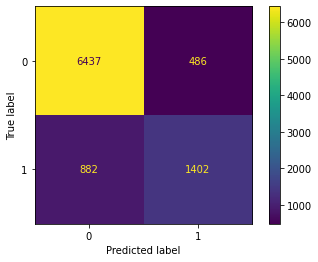

In [76]:
print("RECALL SCORE =", recall_score(y_pred,y_test))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(xgb,X_test,y_test))

## XGBOOST - var

In [77]:
xgb_var1 = XGBClassifier(n_estimators = 180)
xgb_var1.fit(X_train,y_train)
y_pred = xgb_var1.predict(X_test)

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RECALL SCORE =  0.6103327495621717
0.6660296225513617
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6923
           1       0.73      0.61      0.67      2284

    accuracy                           0.85      9207
   macro avg       0.81      0.77      0.78      9207
weighted avg       0.84      0.85      0.84      9207

0.7684770782333463


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


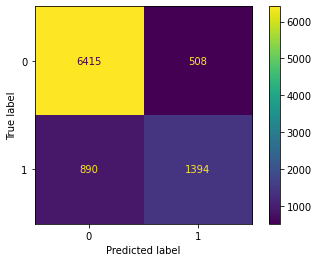

In [78]:
print("RECALL SCORE = ", recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(plot_confusion_matrix(xgb_var1,X_test,y_test))

## XGBOOST + CV

In [79]:
kfold = StratifiedKFold(n_splits=5)    #5 mismo result   #mejora el Recall de 0.27!
modelo_cv = XGBClassifier(random_state=35)     
cv_results = cross_val_score(modelo_cv, X_train,y_train,cv=kfold,scoring="recall")

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
cv_results.mean()

0.5982732271459352

In [82]:
cv_results.std()

0.013434541695453247

## 5.2. Aplicación de Pipeline:

Aplicamos también un Pipeline a los dos tipos de modelos que mejores resultados han dado: Decision Tree y RandomForest

### Decision Tree en Pipeline:

In [87]:
pl_dec_tree = Pipeline(steps = [("mod_dec_tree", DecisionTreeClassifier())])
params_mod_dec_tree = {"mod_dec_tree__criterion":["gini","entropy"], "mod_dec_tree__min_samples_leaf":[10,20,50], "mod_dec_tree__class_weight": [None, "balanced"]}
mod_dec_tree = RandomizedSearchCV(pl_dec_tree,
                         params_mod_dec_tree,
                         cv = 8,
                         scoring = 'recall',
                         verbose = 1) 
#ENTRENAR
mod_dec_tree.fit(X_train,y_train)

#APLICAR A TEST
y_pred = mod_dec_tree.predict(X_test)

#RESULTADOS
print("RandomForest: resultados del entrenamiento sobre el grupo test")
print("RECALL SCORE:",recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#print(confusion_matrix(X_test,y_test))

Fitting 8 folds for each of 10 candidates, totalling 80 fits
RandomForest: resultados del entrenamiento sobre el grupo test
RECALL SCORE: 0.8450087565674256
0.6805359661495064
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6923
           1       0.57      0.85      0.68      2284

    accuracy                           0.80      9207
   macro avg       0.75      0.82      0.77      9207
weighted avg       0.85      0.80      0.81      9207

0.8172032082707126


### RandomForest en Pipeline

In [89]:
pl_rf_clas = Pipeline(steps = [("mod_rf_clas", RandomForestClassifier())])
params_mod_rf_clas = {"mod_rf_clas__n_estimators":[15,30,45,60], "mod_rf_clas__min_samples_leaf":[10,20,50], "mod_rf_clas__class_weight": [None, "balanced"], "mod_rf_clas__n_jobs": [-1]}
gs_mod_rf_clas = RandomizedSearchCV(pl_rf_clas,
                         params_mod_rf_clas,
                         cv = 8,
                         scoring = 'recall',
                         verbose = 1)
#ENTRENAR
gs_mod_rf_clas.fit(X_train,y_train)

#APLICAR A TEST
y_pred = gs_mod_rf_clas.predict(X_test)

#RESULTADOS
print("RandomForest: resultados del entrenamiento sobre el grupo test")
print("RECALL SCORE:",recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#print(confusion_matrix(X_test,y_test))

Fitting 8 folds for each of 10 candidates, totalling 80 fits
RandomForest: resultados del entrenamiento sobre el grupo test
RECALL SCORE: 0.861646234676007
0.6830961471711211
              precision    recall  f1-score   support

           0       0.94      0.78      0.86      6923
           1       0.57      0.86      0.68      2284

    accuracy                           0.80      9207
   macro avg       0.76      0.82      0.77      9207
weighted avg       0.85      0.80      0.81      9207

0.8217663500405891


Estos dos entrenamientos extra (por Pipeline) no nos han proporcionado mejores resultados que el entrenamiento gestionado de manera manual.  
De lo anterior, podemos seleccionar el mejor modelo:

# 6. SELECCION MODELO

El modelo que mejor predicción ha podido proporcionar para nuestro propósito, es decir, con el resultado de recall más alto, es el RandomTreeClassifier. Hagamos otro intento para ver si podemos mejorarlo aún.

# 7. OPTIMIZAR MODELO: (RE-)TUNING HYPERPARÁMETROS

In [90]:
model = RandomForestClassifier(class_weight="balanced")
params = [{"n_estimators": [25,50,75,100,150,200], "max_depth": [2,3,4,5,6,8]}]

gridsearch = GridSearchCV(model, params, cv=5, scoring="recall",n_jobs=-1)    #no incluimos return_train_score en base a la explicación en sklearn: informs about over/underfitting problem, but processing = expensive, not really extra parameter to get a better score
                                                #n_jobs=-1:use all processor
gridsearch.fit(X_train,y_train)                                 
y_pred = gridsearch.predict(X_test)
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)
#print(gridsearch.score(y_test,y_pred))

{'max_depth': 4, 'n_estimators': 25}
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=25)


In [100]:
my_model = gridsearch.best_estimator_
my_model

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=25)

In [96]:
print("FINAL RECALL SCORE =", recall_score(y_test,y_pred))

FINAL RECALL SCORE = 0.8949211908931699


Gracias al GridSearch, hemos podido mejorar nuestro score recall hasta 0.8949.

Veamos, sin embargo, desde una perspectiva un poco más amplia cómo se distribuyen nuestros outputs de nuestro grupo test en cuanto a false negatives/positives, en true negatives/positives:

In [93]:
y_pred = gridsearch.predict(X_test)
display(pd.crosstab(columns=y_pred, index=y_test).round(3))    #normalize = True
print('recall: {:.3f}'.format(recall_score(y_test,y_pred)))
print('precision: {:.3f}'.format(precision_score(y_test, y_pred)))   
print('accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('f1-score: {:.3f}'.format(f1_score(y_test, y_pred)))

col_0,0,1
result_01,,
0,4865,2058
1,240,2044


recall: 0.895
precision: 0.498
accuracy: 0.750
f1-score: 0.640


Visualizamos este mismo resultado algo mejor:

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


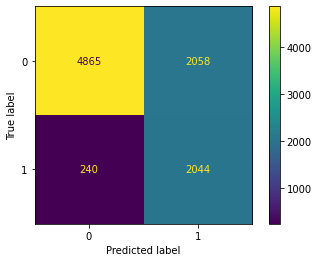

In [94]:
plot_confusion_matrix(gridsearch,X_test,y_test)

Notamos que se incluyen en nuestro grupo 'target' bastantes 'false positives' también, pero dado nuestro objetivo, es el precio que pagamos sin problemas para obtener un score cuanto más alto posible de predecir los '1' de lo que realmente lo son.

Veamos también qué pinta tiene la curva roc:

In [95]:
print('roc_auc_score: {:.3f}'.format(roc_auc_score(y_test, y_pred)))

roc_auc_score: 0.799


In [97]:
y_pred_proba = gridsearch.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

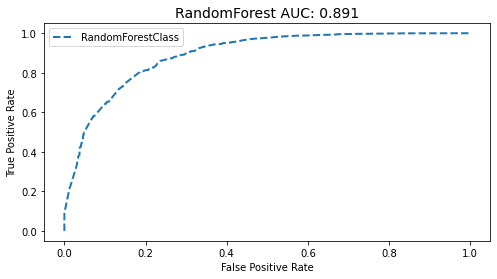

In [98]:
fig = plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, linestyle='--', lw=2, label='RandomForestClass')
plt.legend()
plt.title("RandomForest AUC: {:.3f}".format(auc(x=fpr, y=tpr)), fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
#se puede comparar con result otros modelos!

**FEATURE IMPORTANCE**

In [101]:
my_model.feature_importances_

array([0.17420148, 0.19526306, 0.01805259, 0.0994245 , 0.04107919,
       0.04251283, 0.        , 0.03963762, 0.02967384, 0.36015488])

In [105]:
data_proc.columns[:-1]

Index(['age', 'education-num', 'hours-per-week', 'capital-gain', 'sex',
       'REL-NotInFam', 'REL-OtherRelat', 'REL-OwnChild', 'REL-Unmarr',
       'REL-Spouse'],
      dtype='object')

In [106]:
feat_importances = pd.DataFrame(my_model.feature_importances_,
                          data_proc.columns[:-1], 
                          columns = ["Feature importances"]).sort_values("Feature importances", ascending=False)
feat_importances

,Feature importances
REL-Spouse,0.360155
education-num,0.195263
age,0.174201
capital-gain,0.099424
REL-NotInFam,0.042513
sex,0.041079
REL-OwnChild,0.039638
REL-Unmarr,0.029674
hours-per-week,0.018053
REL-OtherRelat,0.000000


De manera algo sorprendente, vemos que REL-Spouse es el rasgo que más contribuye en este modelo para predecir un sueldo alto.

Dado que los mejores resultados se basan en modelos que consisten en DecisionTreeClassifiers, no aplicamos ningún Scaler en nuestro modelo final. (entre otros: https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6)

**Después de este análisis, podemos proponer a nuestra organización el modelo que permite, en base a los criterios de los cuales disponemos, predecir a quién contactar con nuestra propuesta de inversión, y a quién no. Implica una estratégia mucho más eficaz en cuanto a implicación de recursos por parte de nuestra organización, y aumentará la eficacia de nuestros recursos invertidos vs. beneficio para la organización.**

# 8. GUARDAR EL MODELO PARA SU APLICACIÓN

In [112]:
with open('../model/my_model_desdeJUP', 'wb') as archivo_out:
    pickle.dump(my_model, archivo_out)

para volver a usar:

In [113]:
with open('../model/my_model_desdeJup', 'rb') as archivo_in:
    loaded_model = pickle.load(archivo_in)
# loaded_model = pickle.load(open('my_model', 'rb'))